In [1]:
import numpy as np 
from sklearn.neighbors import KernelDensity 
from scipy import signal 
import matplotlib.pyplot as plt 

[ 1.21212121 11.06060606]


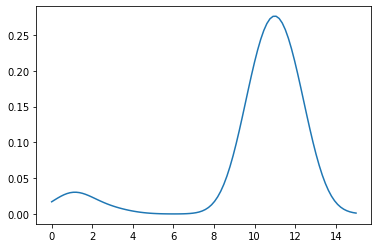

In [2]:
X1 = np.random.randint(1, 4, 20) 
X2 = np.random.randint(10, 13, 200) 
X = np.concatenate((X1, X2), axis=0)  #峰值应该在2和11

bw = 1 
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X.reshape(-1, 1)) 
estimator = np.linspace(0, 15, 100) 
kde_est = np.exp(kde.score_samples(estimator.reshape(-1, 1))) 

plt.plot(estimator, kde_est) 

peaks_pos = signal.argrelextrema(kde_est, np.greater)[0] 

print(estimator[peaks_pos]) 

#### 2个峰靠得太近被发现

[6.06060606]


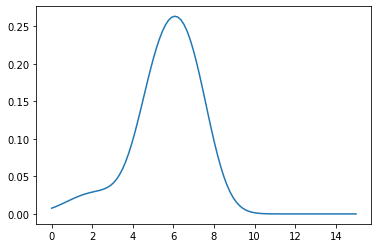

In [3]:
X1 = np.random.randint(1, 4, 20) 
X2 = np.random.randint(5, 8, 200) 
X = np.concatenate((X1, X2), axis=0) 
# the peaks schould be at 2 and 6! 

bw = 1 

kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X.reshape(-1, 1)) 
estimator = np.linspace(0, 15, 100) 
kde_est = np.exp(kde.score_samples(estimator.reshape(-1, 1))) 

plt.plot(estimator, kde_est) 

peaks_pos = signal.argrelextrema(kde_est, np.greater)[0] 

print(estimator[peaks_pos]) 
# the peaks are at around 6 and sometimes 2! 

### 参数选择

In [8]:
def make_data(N,f = 0.3, rseed = 1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f*N):] += 5
    return x
x = make_data(20)

##### 直方图：区间的高度反应的并不是统计频次，而是反应概率密度

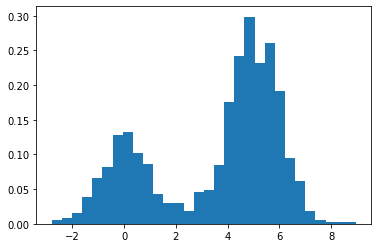

In [31]:
hist = plt.hist(make_data(1000), bins = 30, density = True)

In [13]:
kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(x[:,None])

KernelDensity()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [28]:
bandwidths = 10 ** np.linspace(-1,1,100)
grid = GridSearchCV (KernelDensity( kernel= 'gaussian') ,{ 'bandwidth' : bandwidths} ,cv =LeaveOneOut())
grid.fit(x.reshape(-1,1))
grid.best_params_

{'bandwidth': 1.1233240329780276}

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import scipy.signal as signal
import time

In [36]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [38]:
data = pd.read_csv('/home/weijunfei/NAB-master_new/data/artificialWithAnomaly/art_daily_flatmiddle.csv')
n = data.shape[0]
kde = KernelReg(endog=data['value'], exog=np.arange(n), var_type='c', bw=[12])

estimator = kde.fit(np.arange(n))
estimator = np.reshape(estimator[0],n)

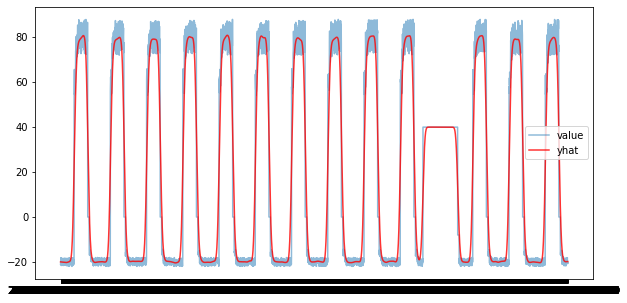

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['timestamp'], data['value'], '-',alpha=0.5 ,label = 'value')
ax.plot(data['timestamp'], estimator, '-', color='r', alpha=0.8, label = 'yhat')

plt.legend()

plt.show()